# Linear Regression

Linear regression is an approach to model the relationship between a single dependent variable (target variable) and one (simple regression) or more (multiple regression) independent variables. The linear regression model assumes a linear relationship between the input and output variables. If this relationship is present, we can estimate the coefficients required by the model to make predictions on new data.

In [1]:
import pandas as pd
df=pd.read_csv(r'/home/aarush100616/Downloads/Projects/Linear Regression/weight-height.csv')
df

Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

In [3]:
df.shape

(10000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
df.Gender.nunique()

2

In [7]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

Text(0, 0.5, 'Frequency')

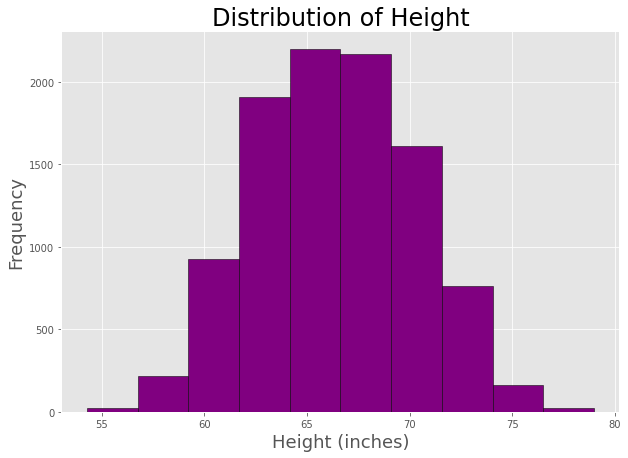

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# histogram of the height
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

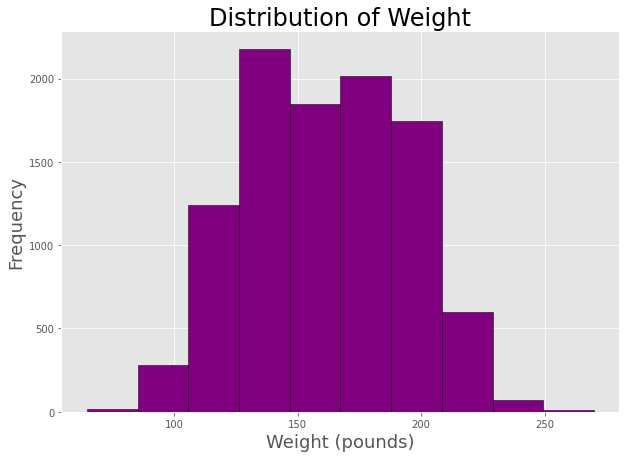

In [10]:
# histogram of the weight
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

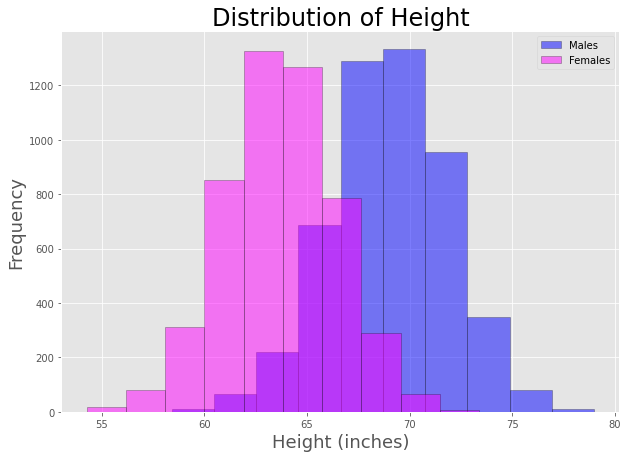

In [11]:
# histogram of the height - males and females
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

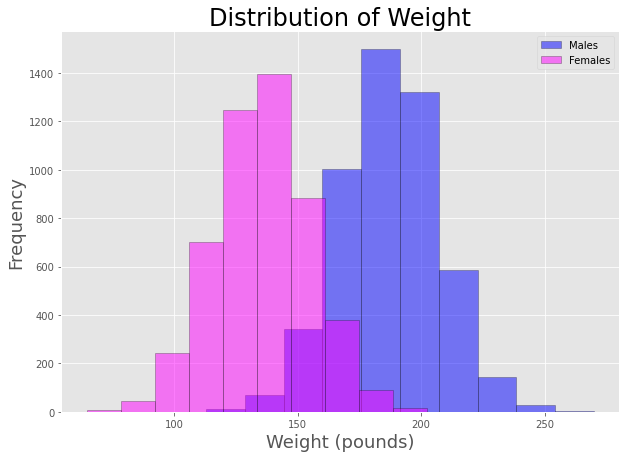

In [12]:
# histogram of the weight - males and females
df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [13]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)
# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)
# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

Height_male  Weight_male  Height_female  Weight_female
count  5000.000000  5000.000000    5000.000000    5000.000000
mean     69.026346   187.020621      63.708774     135.860093
std       2.863362    19.781155       2.696284      19.022468
min      58.406905   112.902939      54.263133      64.700127
25%      67.174679   173.887767      61.894441     122.934096
50%      69.027709   187.033546      63.730924     136.117583
75%      70.988744   200.357802      65.563565     148.810926
max      78.998742   269.989699      73.389586     202.237214

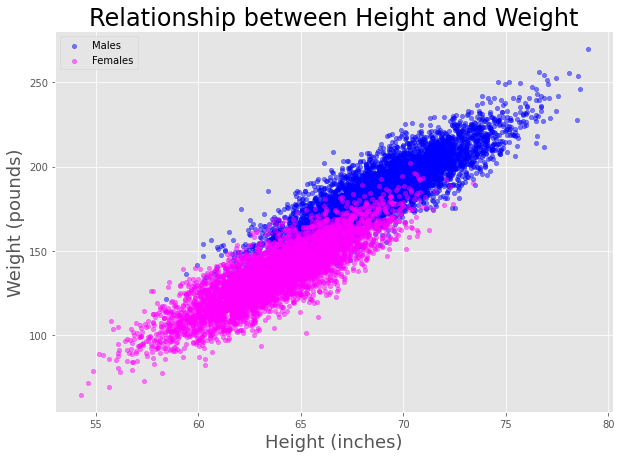

In [14]:
# Scatter plot of Height and Weight
ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

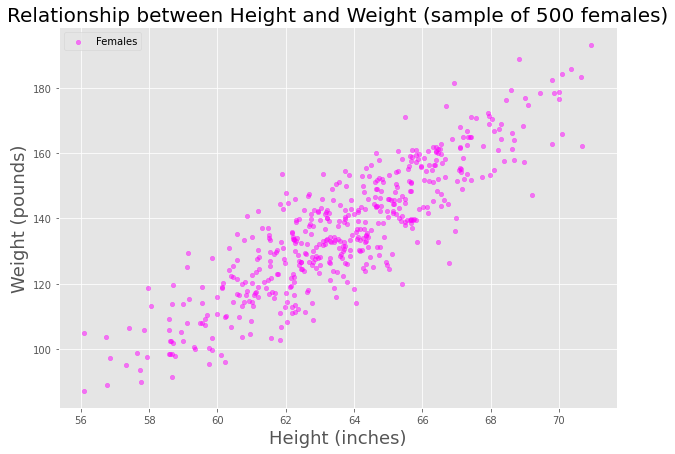

In [15]:
# Scatter plot of 500 females
sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

## Simple Linear Regression (SLR)

Simple linear regression is a linear approach to modeling the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data.
(y=a+bx)where x is the independent variable (height), y is the dependent variable (weight), b is the slope, and a is the intercept. The intercept represents the value of y when x is 0 and the slope indicates the steepness of the line. The objective is to obtain the line that best fits our data (the line that minimize the sum of square errors). The error is the difference between the real value y and the predicted value y_hat, which is the value obtained using the calculated linear equation.
{error = y(real)-y(predicted) = y(real)-(a+bx)}

In [16]:
import numpy as np
# best fit polynomials
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
# polynomial - males
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
# polynomial - females
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

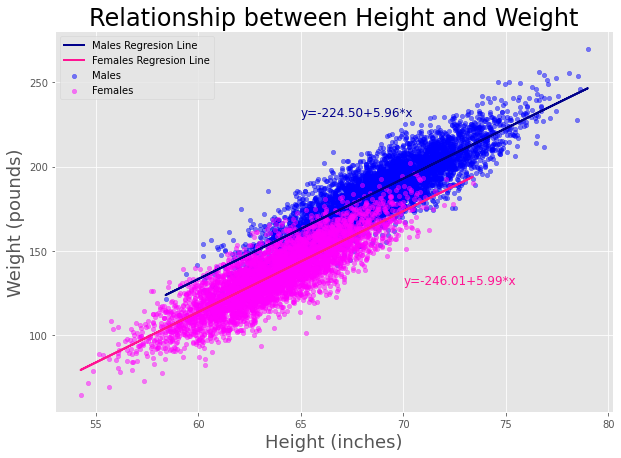

In [17]:
# scatter plots and regression lines
# males and females dataframes
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)
# regression lines
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1], color='deeppink', linewidth=2)
# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)
# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

### With seaborn

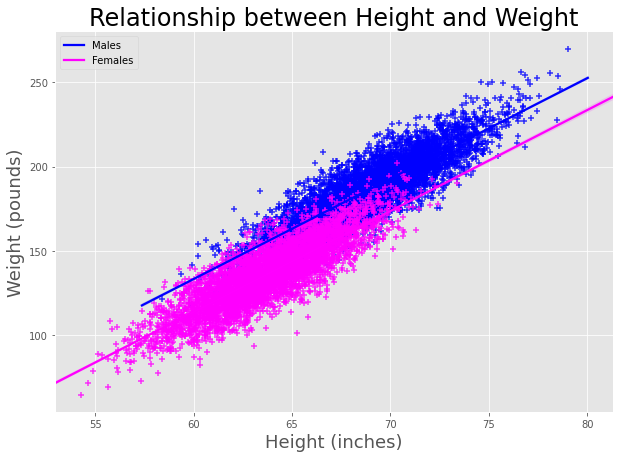

In [18]:
import seaborn as sns
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')
# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

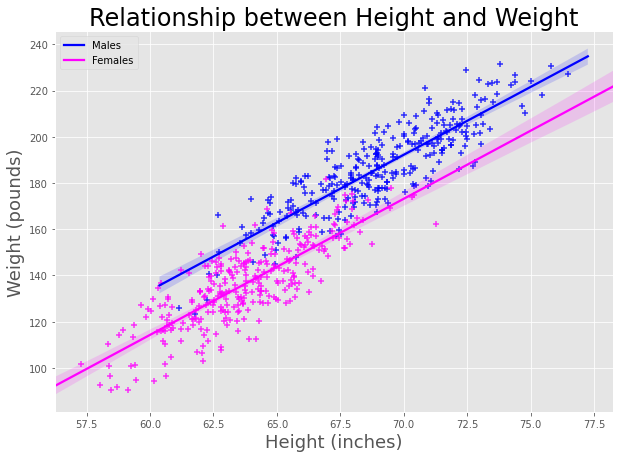

In [19]:
import seaborn as sns
# 300 random samples
df_males_sample = df[df['Gender'] == 'Male'].sample(300)
df_females_sample = df[df['Gender'] == 'Female'].sample(300)
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta', marker='+')
# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

## Fitting a simple linear model using sklearn

In [20]:
from sklearn.linear_model import LinearRegression
df_males = df[df['Gender'] == 'Male']
# create linear regression object
lr_males = LinearRegression()
# fit linear regression
lr_males.fit(df_males[['Height']], df_males['Weight'])
# get the slope and intercept of the line best fit
print(lr_males.intercept_)
print(lr_males.coef_)
df_females = df[df['Gender'] == 'Female']
# create linear regression object
lr_females = LinearRegression()
# fit linear regression
lr_females.fit(df_females[['Height']], df_females['Weight'])
# get the slope and intercept of the line best fit
print(lr_females.intercept_)
print(lr_females.coef_)

-224.4988407054588
[5.96177381]
-246.01326574667266
[5.99404661]


In [21]:
df_females = df[df['Gender'] == 'Female']
# fit the model using numpy
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
# predictions using numpy
print(np.polyval(female_fit, [60]))
# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])
# predictions using scikit learn
print(lr_females.predict([[60]]))

[113.62953114]
[113.62953114]


## Pearson correlation coefficient

In [22]:
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']
# correlation coefficients 
df_females.corr()

Height    Weight
Height  1.000000  0.849609
Weight  0.849609  1.000000

In [23]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']
# correlation coefficients 
df_males.corr()

Height    Weight
Height  1.000000  0.862979
Weight  0.862979  1.000000

A rule of thumb for interpreting the size of the correlation coefficient is the following:

    1–0.8 → Very strong
    0.799–0.6 → Strong
    0.599–0.4 → Moderate
    0.399–0.2 → Weak
    0.199–0 → Very Weak

## Pearson using scipy

In [24]:
from scipy import stats
# dataframe containing only females
df_females = df[df['Gender'] == 'Female']
# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)
print(pearson_coef)
# dataframe containing only males
df_males = df[df['Gender'] == 'Male']
# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)
print(pearson_coef)

0.8496085914186008
0.8629788486163177


## Residual plots

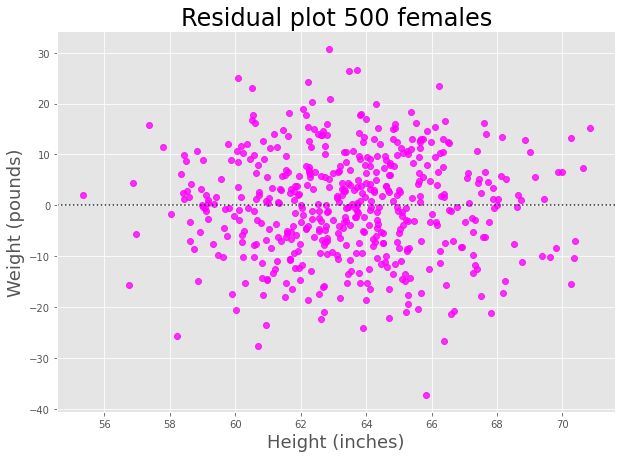

In [25]:
import seaborn as sns
# dataframe containing only females
df_females = df[df['Gender'] == 'Female'].sample(500)
# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_females.Height, df_females.Weight, color='magenta')
# title and labels
plt.title('Residual plot 500 females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

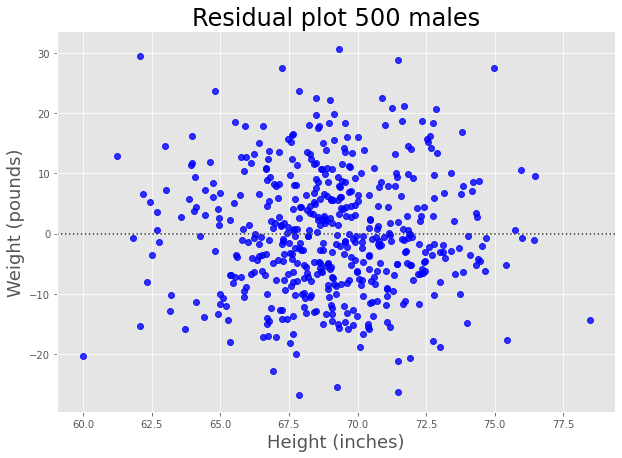

In [26]:
# dataframe containing only males
df_males = df[df['Gender'] == 'Male'].sample(500)
# residual plot 500 males
fig = plt.figure(figsize=(10, 7))
sns.residplot(df_males.Height, df_males.Weight, color='blue')
# title and labels
plt.title('Residual plot 500 males', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

As we can see, the points are randomly distributed around 0, meaning linear regression is an appropriate model to predict our data. If the residual plot presents a curvature, the linear assumption is incorrect. In this case, a non-linear function will be more suitable to predict the data.

## Multiple linear regression

Multiple linear regression uses a linear function to predict the value of a target variable y, containing the function n independent variable x=[x₁,x₂,x₃,…,xₙ].
    y =b ₀+b ₁x ₁+b₂x₂+b₃x₃+…+bₙxₙ
We obtain the values of the parameters bᵢ, using the same technique as in simple linear regression (least square error). After fitting the model, we can use the equation to predict the value of the target variable y. In our case, we use height and gender to predict the weight of a person Weight = f(Height,Gender).

Categorical variables in multiple linear regression
There are two types of variables used in statistics: numerical and categorical variables.
    Numerical variables represent values that can be measured and sorted in ascending and descending order such as the height of a person.
    Categorical variables are values that can be sorted in groups or categories such as the gender of a person.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dataset = pd.read_csv("/home/aarush100616/Downloads/Projects/Linear Regression/advertising.csv")

In [33]:
dataset

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]

In [34]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [37]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [38]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [39]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  4.334595861728431
Coefficients:


[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558054),
 ('Newspaper', 0.006289950146130339)]

In [40]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)

In [41]:
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35221067 20.96344625 16.48851064 20.10971005 21.67148354 16.16054424
 13.5618056  15.39338129 20.81980757 21.00537077 12.29451311 20.70848608
  8.17367308 16.82471534 10.48954832  9.99530649 16.34698901 14.5758119
 17.23065133 12.56890735 18.55715915 12.12402775 20.43312609 17.78017811
 16.73623408 21.60387629 20.13532087 10.82559967 19.12782848 14.84537816
 13.13597397  9.07757918 12.07834143 16.62824427  8.41792841 14.0456697
  9.92050209 14.26101605 16.76262961 17.17185467 18.88797595 15.50165469
 15.78688377 16.86266686 13.03405813 10.47673934 10.6141644  20.85264977
 10.1517568   6.88471443 17.88702583 18.16013938 12.55907083 16.28189561
 18.98024679 11.33714913  5.91026916 10.06159509 17.62383031 13.19628335]


In [44]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':
                         y_pred_mlr})
mlr_diff.head()

Actual value  Predicted value
126           6.6         9.352211
104          20.7        20.963446
99           17.2        16.488511
92           19.4        20.109710
111          21.8        21.671484

In [45]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 90.11
Mean Absolute Error: 1.227818356658941
Mean Square Error: 2.6360765623280655
Root Mean Square Error: 1.623599877533891


## Conclusion
The Multiple Linear Regression model performs well as 90.11% of the data fit the regression model. Also, the mean absolute error, mean square error, and the root mean square error are less.